# Name: Maryan Daud Ahmed 
# Project: Predictive analysis on factors contributing to uptake of HIN1 and Seasonal Flu vaccine 

# Overview 

![overview](images/H1N1_intro_vaccine.jpg)

Vaccination,remains a key public health measure used to fight infectious diseases globally. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity"

Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.

A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. 

A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

This project aims to analyze factors that influence individuals' decision-making processes regarding getting vaccinated against H1N1 and seasonal flu. By gaining insights into these factors,healthcare department can develop targeted strategies and interventions to increase vaccination rates and improve public health outcomes during pandemics 

# Problem Statement 

The world has recently experienced the impact of major flu outbreaks like the COVID-19, Swine Flu (H1N1) and the Avian Flu(H5N1). The effect of any flu outbreak depends on the type of flu and its respective variants, the population demographics like age, and other underlying health conditions of the individual and vaccination status of the population.Seasonal flu places a substantial burden on the health of people each year. CDC estimates that flu has resulted in 9 million – 41 million illnesses, 140,000 – 710,000 hospitalizations and 12,000 – 52,000 deaths annually between 2010 and 2020.Despite the availability and effectiveness of flu vaccines, there are still significant portions of the population who choose not to get vaccinated. 

To address this problem, it is crucial to investigate the reasons behind these decisions and identify the key factors driving individuals' opinions, perceptions, and behaviors related to flu vaccination and develop startegic interventions to target different cohort and improve vaccine uptake

# Objectives 

1) Determine demographic factors (age,gender,occupation) that determine vaccine upatek 
2) Determine Knowledge, Opinions(Attitude) and Behavoiurs (Practices) that influence vaccine uptake
3) Predict how likely individuals are to receive their H1N1 and seasonal flu vaccines
4) Evaluate AUC & ROC performace of predictive models used 

# Data Understanding 

We will use data sets from phone survey where respondents were asked whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission.from [Predict H1N1 and Seasonal Flu Vaccines](https://www.drivendata.org/competitions/66/flu-shot-learning/)

### Loading libraries 

In [1]:
#loading libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading dataset with variables assessed
flu_dataset_1 = pd.read_csv("training_set_features.csv", index_col="respondent_id", encoding="latin1")
flu_dataset_1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
#Loading the second dataframe that contains a binary classification of whether the respondents got the H1N1 or the Seasonal flu Vaccine
vaccination_status = pd.read_csv('training_set_labels.csv',index_col="respondent_id", encoding="latin1")
vaccination_status.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


### Merging two data sets containing responses and vaccination status 

In [4]:
#We merge dataframes on respondent_id to merge all variable in one 
flu_merged = pd.merge(flu_dataset_1, vaccination_status, on='respondent_id', how='left')
flu_merged.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### Loading description data for better understanding

In [5]:
#Showing a description of how data has been coded for better understanding 
data_description_df= pd.read_csv('H1N1- Flu Data Description.csv', encoding="latin1")
data_description_df

,Col_name,Description
0,seasonal_vaccine,Whether respondent received seasonal flu vacci...
1,h1n1_vaccine,Whether respondent received H1N1 flu vaccine. ...
2,respondent_id,Unique and random identifier.
3,h1n1_concern,Level of concern about the H1N1 flu.(0 = Not ...
4,h1n1_knowledge,Level of knowledge about H1N1 flu.(0 = No kno...
5,behavioral_antiviral_meds,Has taken antiviral medications. (binary)
6,behavioral_avoidance,Has avoided close contact with others with fl...
7,behavioral_face_mask,Has bought a face mask. (binary)
8,behavioral_wash_hands,Has frequently washed hands or used hand sani...
9,behavioral_large_gatherings,Has reduced time at large gatherings. (binary)


# Data Cleaning

In [6]:
#Checking column names for data understanding
flu_merged.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [7]:
# Decoding the coded information of Respondent's opinion about H1N1 vaccine effectiveness using the descriptions above.
flu_merged.h1n1_concern=flu_merged.h1n1_concern.replace({0 :"Not at all concerned", 1 : "Not very concerned", 2 : "Somewhat concerend",
                                                         3 : "Very concerend"})                          
flu_merged.h1n1_knowledge=flu_merged.h1n1_knowledge.replace({0 :"No Knowledge", 1 : "A little knowledge",2 : "Alot of knowledge"})

flu_merged.opinion_h1n1_vacc_effective=flu_merged.opinion_h1n1_vacc_effective.replace({1 :"Not at all effective", 2 : "Not very effective",3 : "Don't know",
                                                             4 :"Somewhat effective", 5: "Very effective"})
#Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
flu_merged.opinion_h1n1_risk=flu_merged.opinion_h1n1_risk.replace({1 :"Very Low", 2 : "Somewhat low",3: "Don't know",
                                                               4 : "Somewhat high", 5 :"Very high"})
#Respondent's opinion about seasonal flu vaccine effectiveness.                                                            
flu_merged.opinion_seas_vacc_effective=flu_merged.opinion_seas_vacc_effective.replace({1 :"Not at all effective", 2 : "Not very effective",3 : "Don't know",
                                                             4 :"Somewhat effective", 5: "Very effective"})
#Respondent's opinion about seasonal flu vaccine effectiveness.
flu_merged.opinion_h1n1_sick_from_vacc= flu_merged.opinion_h1n1_sick_from_vacc.replace({1 : "Not at all worried",2: "Not very worried" ,3 :"Don't know",
                                                                                 4 : "Somewhat worried" ,5 :"Very worried"})
#Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
flu_merged.opinion_seas_risk=flu_merged.opinion_seas_risk.replace({1 :"Very Low", 2 : "Somewhat low",3: "Don't know",
                                                               4 : "Somewhat high", 5 :"Very high"})
#Respondent's worry of getting sick from taking seasonal flu vaccine
flu_merged.opinion_seas_sick_from_vacc= flu_merged.opinion_seas_sick_from_vacc.replace({1 : "Not at all worried",2: "Not very worried" ,3 :"Don't know",
                                                                                 4 : "Somewhat worried" ,5 :"Very worried"})

In [8]:
#Ensuring decoding above has applied 
flu_merged.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,Not very concerned,No Knowledge,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,Very concerend,Alot of knowledge,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,Not very concerned,A little knowledge,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,Not very concerned,A little knowledge,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,Somewhat concerend,A little knowledge,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [9]:
#checking shape od data before removing missing values 
flu_merged.shape

(26707, 37)

In [10]:
#checking missing values of data 
#missing_values_sum = df.isnull().sum()
#print(missing_values_sum)
missing_values_percentage = (flu_merged.isnull().sum() / len(flu_merged)) * 100
print(missing_values_percentage)

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [11]:
#drop columns with high percentage of missing values 
#dropping health insurance and employment_occupation
flu_merged.drop(['health_insurance','employment_industry','employment_occupation'],axis=1, inplace = True)

In [12]:
#checking shape of data to confirm if changes have applied
flu_merged.shape

(26707, 34)

In [13]:
#Checking for Duplicates
duplicates = flu_merged.duplicated()
#filtered rows of the duplicates
duplicated_rows= flu_merged[duplicates]
print(duplicated_rows)

Empty DataFrame
Columns: [h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children, h1n1_vaccine, seasonal_vaccine]
Index: []

[0 rows x 34 columns]


Data has no dulpicated rows present 

In [14]:
#checking columns with nal values 
flu_merged.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status           

In [15]:
#dropping null values from the data set 
flu_merged = flu_merged.dropna()
flu_merged.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [16]:
#confirming data is clean
flu_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19642 non-null  object 
 1   h1n1_knowledge               19642 non-null  object 
 2   behavioral_antiviral_meds    19642 non-null  float64
 3   behavioral_avoidance         19642 non-null  float64
 4   behavioral_face_mask         19642 non-null  float64
 5   behavioral_wash_hands        19642 non-null  float64
 6   behavioral_large_gatherings  19642 non-null  float64
 7   behavioral_outside_home      19642 non-null  float64
 8   behavioral_touch_face        19642 non-null  float64
 9   doctor_recc_h1n1             19642 non-null  float64
 10  doctor_recc_seasonal         19642 non-null  float64
 11  chronic_med_condition        19642 non-null  float64
 12  child_under_6_months         19642 non-null  float64
 13  health_worker        

# Exploratory Data Analysis 

# Univariate analysis 

In [17]:
# Viweing columns for ease of viewing columns for analysis
flu_merged.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

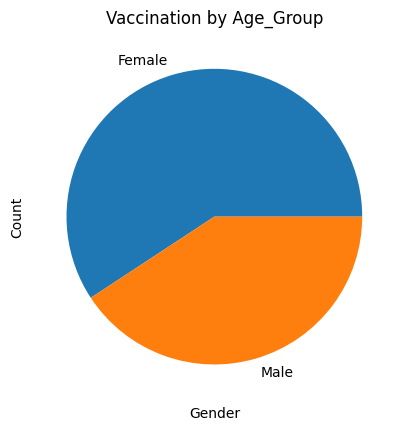

In [18]:
#showing data by gender  
gender_category_count = flu_merged['sex'].value_counts()
gender_category_count.plot(kind = 'pie', title = 'Vaccination by Age_Group')
plt.xlabel ('Gender')
plt.ylabel ('Count')
plt.show()

##### Majority of respondents were female 

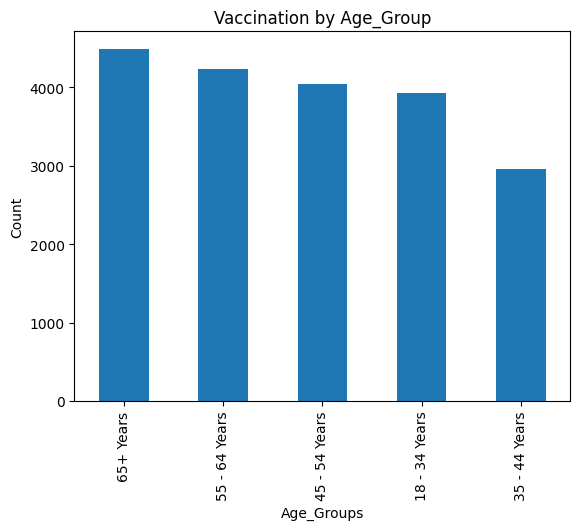

In [19]:
#showing data by age groups 
age_category_count = flu_merged['age_group'].value_counts()
age_category_count.plot(kind = 'bar', title = 'Vaccination by Age_Group')
plt.xlabel ('Age_Groups')
plt.ylabel ('Count')
plt.show()


##### Majority of the respondents were 65 years and above and least were between the age group of 35 -44 years

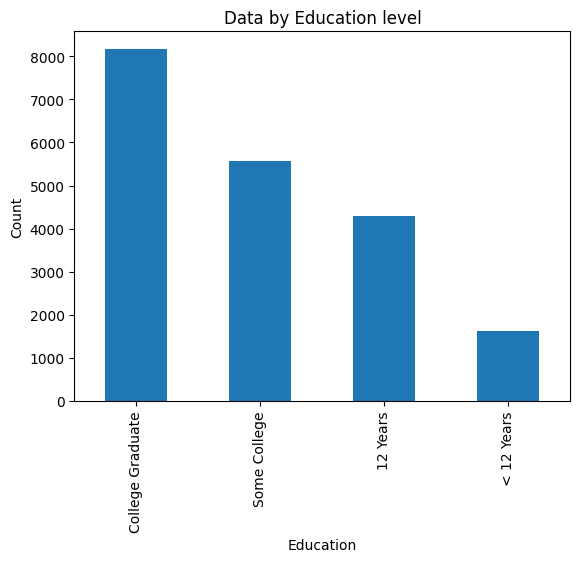

In [20]:
#showing data by education
education_category_count = flu_merged['education'].value_counts()
education_category_count.plot(kind = 'bar', title = 'Data by Education level')
plt.xlabel ('Education')
plt.ylabel ('Count')
plt.show()

##### Majority of respondents were college graduates with least being school goes of less than 12 years 

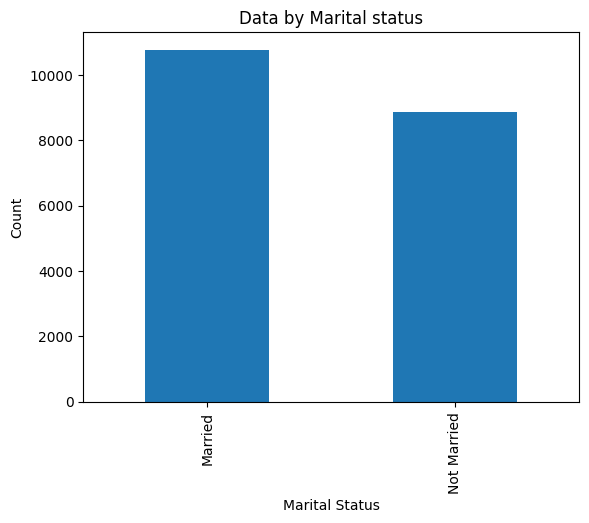

In [21]:
 
#showing data by marital status
marital_category_count = flu_merged['marital_status'].value_counts()
marital_category_count .plot(kind = 'bar', title = 'Data by Marital status')
plt.xlabel ('Marital Status')
plt.ylabel ('Count')
plt.show()

##### Most respondents were married 

In [22]:
#displaying frquencies and percenatges of non numeric columns 
non_numeric_columns = flu_merged.select_dtypes(exclude='number')

#creating count and percentage table
for col in non_numeric_columns.columns:
    counts = flu_merged[col].value_counts(dropna=False)
    percentage = flu_merged[col].value_counts(normalize=True, dropna= False)* 100
    summary = pd.DataFrame({'Count': counts, 'Percentage (%)' : percentage.round(2)})
    print(summary)

                      Count  Percentage (%)
h1n1_concern                               
Somewhat concerend     7989           40.67
Not very concerned     6229           31.71
Very concerend         3175           16.16
Not at all concerned   2249           11.45
                    Count  Percentage (%)
h1n1_knowledge                           
A little knowledge  10861           55.29
Alot of knowledge    7362           37.48
No Knowledge         1419            7.22
                             Count  Percentage (%)
opinion_h1n1_vacc_effective                       
Somewhat effective            9172           46.70
Very effective                5715           29.10
Don't know                    2838           14.45
Not very effective            1347            6.86
Not at all effective           570            2.90
                   Count  Percentage (%)
opinion_h1n1_risk                       
Somewhat low        7691           39.16
Very Low            5881           29.94
Somew

From the table generated we can oberve that 
1) majority of respondent were Somewhat concerend of HIN1 at 40.67% 
2) Respondent stated that HINI vaccine was Somewhat effective at 46.70
3) Were aware that H1N1 vaccintion provided Somewhat low riks after vaccination 39.16

In [23]:
#show numeric data summary 
flu_merged.describe()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000,19642.000000
mean,0.049435,0.740454,0.067712,0.834895,0.353274,0.330058,0.685012,0.225995,0.333520,0.283881,0.083851,0.118725,0.903218,0.551064,0.229814,0.477955
std,0.216780,0.438397,0.251258,0.371285,0.477999,0.470246,0.464523,0.418247,0.471482,0.450891,0.277171,0.323473,0.746290,0.938224,0.420724,0.499527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000


# Bivariate Analysis 

#### Analysis of demographic, behavioral and opinions by vaccination status 
#### Vaccinated = '1'
#### Not Vaccinate = '0'

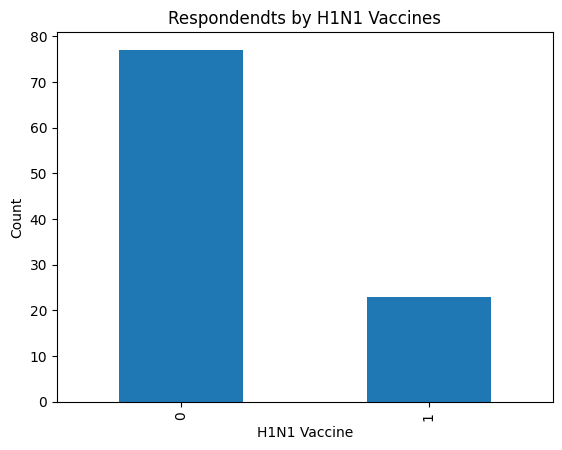

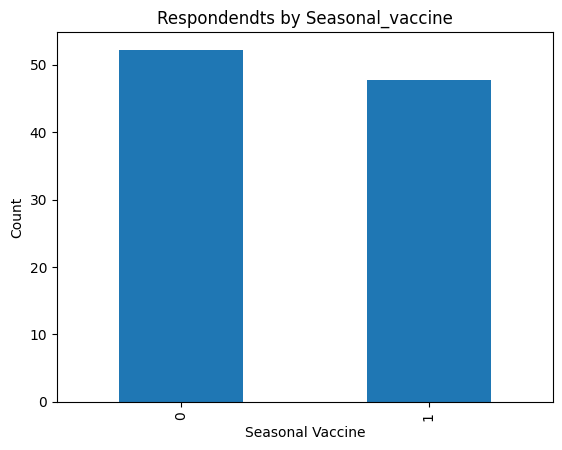

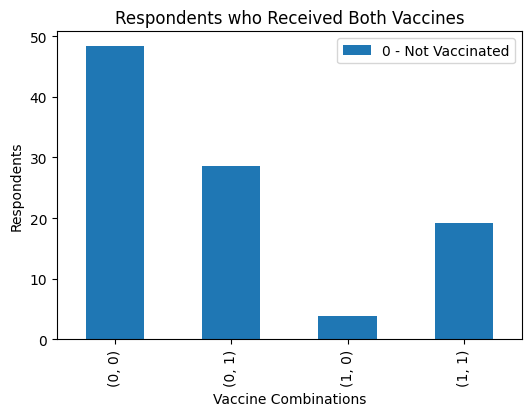

In [24]:
#Show respondents by vaccine type 
#H1N1 Vaccine
HIN1_vaccine = flu_merged['h1n1_vaccine'].value_counts() / len(flu_merged['h1n1_vaccine'])*100
HIN1_vaccine.plot (kind = 'bar', title = 'Respondendts by H1N1 Vaccines')
plt.xlabel ('H1N1 Vaccine')
plt.ylabel ('Count')
plt.show()

#Seasonal vaccine 
Seasonal_vaccine = flu_merged['seasonal_vaccine'].value_counts() / len(flu_merged['seasonal_vaccine'])*100
Seasonal_vaccine.plot (kind = 'bar', title = 'Respondendts by Seasonal_vaccine')
plt.xlabel ('Seasonal Vaccine')
plt.ylabel ('Count')
plt.show()

# Both vaccines
# Calculate the count of participants who took each combination of vaccines
vaccine_counts = flu_merged.groupby(['h1n1_vaccine', 'seasonal_vaccine']).size() / len(flu_merged)*100

#Bar graph for the vaccine combinations
plt.figure(figsize=(6, 4))
vaccine_counts.plot.bar()
plt.xlabel('Vaccine Combinations')
plt.ylabel('Respondents')
plt.title('Respondents who Received Both Vaccines')
plt.legend(['0 - Not Vaccinated', '1 - Vaccinated'])
plt.show()


Observation
Percentage of respondents who received only H1N1:  21%
Percentage of respondents who received only Seasonal Vaccine:  46%
Percentage of respondents who received both vaccines about 18%
Percentage of respondents who received one of the vaccines about 48%

Plotting vaccination status by: 
1) Demogrphic variables, we will use age group, gender , marital status, race, employment status 
2) By opinions (Attitude) we will use :opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk'
3) By behaviour(practices) we will use 'behavioral_face_mask', 'behavioral_wash_hands','behavioral_large_gatherings'

In [25]:
#Introdcuing a new column by combining vaccination columns to show vaccination status showing (both, one, none) for use in bivariate analysis 
flu_merged['vaccination_status'] = flu_merged['h1n1_vaccine'] + flu_merged['seasonal_vaccine']
flu_merged['vaccination_status'] = flu_merged['vaccination_status'].map({2: 'both', 1: 'one', 0: 'none'})
flu_merged.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,vaccination_status
respondent_id,,,,,,,,,,,,,,,,,,,,,
26700,Very concerend,A little knowledge,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,0,1,one
26701,Somewhat concerend,Alot of knowledge,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,0,0,none
26702,Somewhat concerend,No Knowledge,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0,none
26703,Not very concerned,Alot of knowledge,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0,none
26706,Not at all concerned,No Knowledge,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,0,0,none


#### Demographic variables 

In [26]:
#selecting the data to plot only for demographic variables and vaccination status 
demographic_data = flu_merged[['age_group', 'race', 'sex','marital_status', 'employment_status', 'race', 'vaccination_status',
                               'h1n1_vaccine', 'seasonal_vaccine']]
demographic_data 

,age_group,race,sex,marital_status,employment_status,race,vaccination_status,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,
0,55 - 64 Years,White,Female,Not Married,Not in Labor Force,White,none,0,0
1,35 - 44 Years,White,Male,Not Married,Employed,White,one,0,1
3,65+ Years,White,Female,Not Married,Not in Labor Force,White,one,0,1
4,45 - 54 Years,White,Female,Married,Employed,White,none,0,0
5,65+ Years,White,Male,Married,Employed,White,none,0,0
...,...,...,...,...,...,...,...,...,...
26700,55 - 64 Years,White,Female,Married,Not in Labor Force,White,one,0,1
26701,18 - 34 Years,White,Female,Not Married,Not in Labor Force,White,none,0,0
26702,65+ Years,White,Female,Not Married,Not in Labor Force,White,none,0,0


### Chi -squared test for association 
Using combine vaccination status column as outcome 

In [27]:
#conducting test of association between demographics assessed and vaccination status
from scipy import stats
demographic_data = flu_merged[['age_group', 'race', 'sex','marital_status', 'employment_status', 'race','vaccination_status','h1n1_vaccine', 'seasonal_vaccine']]
results = []
for col in demographic_data:
    contingency = pd.crosstab(flu_merged[col], flu_merged['vaccination_status'])

    chi2, p, _, _ = stats.chi2_contingency(contingency)
    results.append({
        'variable': col,
        'Test': 'Chi-squared',
        'p-value': round (p, 50),
        'Contingency Shape': contingency.shape 
    })

summary_demographics = pd.DataFrame(results)
print(summary_demographics)

             variable         Test       p-value Contingency Shape
0           age_group  Chi-squared  0.000000e+00            (5, 3)
1                race  Chi-squared  2.405942e-37            (4, 3)
2                 sex  Chi-squared  2.293237e-25            (2, 3)
3      marital_status  Chi-squared  4.226012e-19            (2, 3)
4   employment_status  Chi-squared  0.000000e+00            (3, 3)
5                race  Chi-squared  2.405942e-37            (4, 3)
6  vaccination_status  Chi-squared  0.000000e+00            (3, 3)
7        h1n1_vaccine  Chi-squared  0.000000e+00            (2, 3)
8    seasonal_vaccine  Chi-squared  0.000000e+00            (2, 3)


P values of< 0.05 in all variables inidcate that all demograghic variables assessed are determinats of vaccination 

In [28]:
#conducting test of association between opinions assessed and vaccination status
opinions_data = flu_merged[['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_seas_vacc_effective',
                       'opinion_h1n1_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc','vaccination_status','h1n1_vaccine', 'seasonal_vaccine' ]]
results = []
for col in opinions_data:
    contingency = pd.crosstab(opinions_data[col],opinions_data['vaccination_status'])
    chi2, p, _ , _ = stats.chi2_contingency(contingency)
    results.append({
        'variable': col,
        'Test': 'Chi-squared',
        'p-value': round (p, 50),
        'Contingency Shape': contingency.shape 
    })

summary_opinions = pd.DataFrame(results)
print(summary_opinions)

                      variable         Test       p-value Contingency Shape
0  opinion_h1n1_vacc_effective  Chi-squared  0.000000e+00            (5, 3)
1            opinion_h1n1_risk  Chi-squared  0.000000e+00            (5, 3)
2  opinion_seas_vacc_effective  Chi-squared  0.000000e+00            (5, 3)
3  opinion_h1n1_sick_from_vacc  Chi-squared  2.175112e-44            (5, 3)
4            opinion_seas_risk  Chi-squared  0.000000e+00            (5, 3)
5  opinion_seas_sick_from_vacc  Chi-squared  1.881035e-35            (5, 3)
6           vaccination_status  Chi-squared  0.000000e+00            (3, 3)
7                 h1n1_vaccine  Chi-squared  0.000000e+00            (2, 3)
8             seasonal_vaccine  Chi-squared  0.000000e+00            (2, 3)


#### P values of <0.05 in all variables inidcate that all opinions assessed are determinats of vaccination 

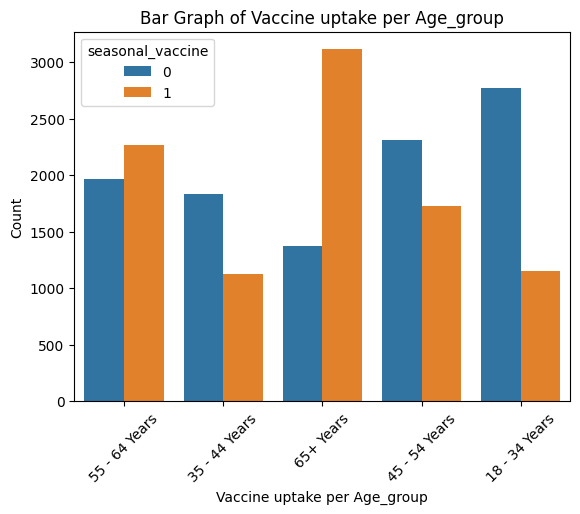

In [29]:
#create a plot to show association between knowledge and vaccination of Seasonal vaccine
sns.countplot ( data = flu_merged, x = 'age_group', hue = 'seasonal_vaccine')
plt.xlabel('Vaccine uptake per Age_group')
plt.ylabel('Count')
plt.title('Bar Graph of Vaccine uptake per Age_group')
plt.xticks(rotation=45)
plt.show()

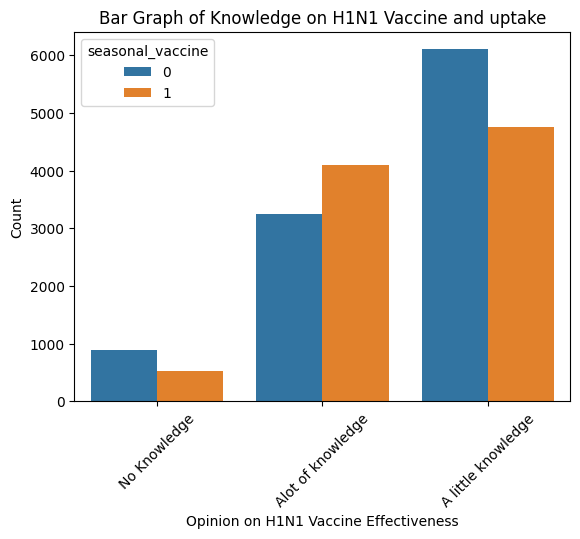

In [30]:
#create a plot to show association between knowledge and vaccination of Seasonal vaccine
sns.countplot ( data = flu_merged, x = 'h1n1_knowledge', hue = 'seasonal_vaccine')
plt.xlabel('Opinion on H1N1 Vaccine Effectiveness')
plt.ylabel('Count')
plt.title('Bar Graph of Knowledge on H1N1 Vaccine and uptake')
plt.xticks(rotation=45)
plt.show()

#### Increased uptake with increase in knowlege on H1N1 vaccine 

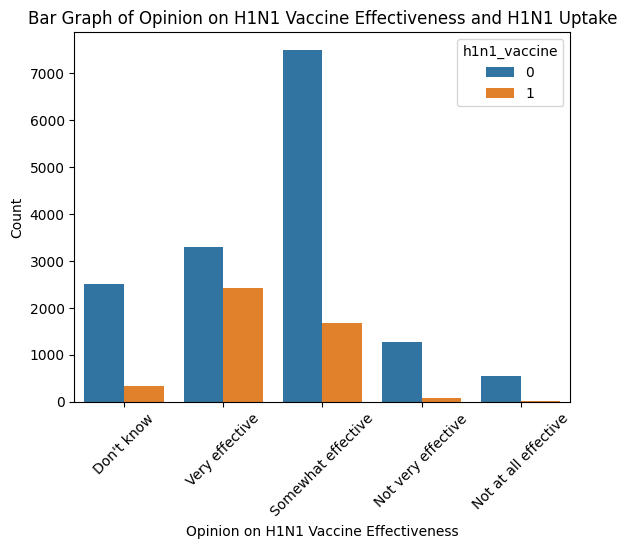

In [31]:
#create a plot to show association between opinion and vaccination of H1N1 
sns.countplot ( data = flu_merged, x = 'opinion_h1n1_vacc_effective', hue = 'h1n1_vaccine')
plt.xlabel('Opinion on H1N1 Vaccine Effectiveness')
plt.ylabel('Count')
plt.title('Bar Graph of Opinion on H1N1 Vaccine Effectiveness and H1N1 Uptake')
plt.xticks(rotation=45)
plt.show()

#### H1N1 Vaccine effectiveness: Majority of the vaccinated reported the vaccine to be very effective while majority of unvaccinated decalred it as somewhat effective 


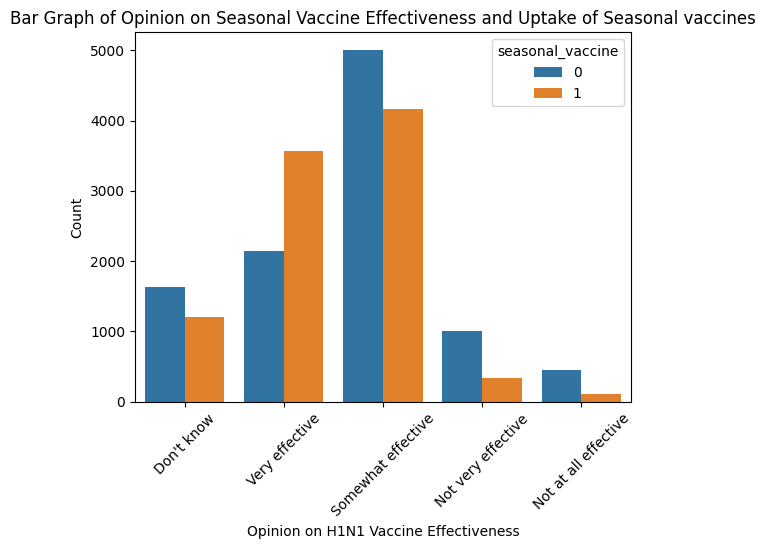

In [32]:
#create a plot to show association between opinion and vaccination of Seasonal vaccine
sns.countplot ( data = flu_merged, x = 'opinion_h1n1_vacc_effective', hue = 'seasonal_vaccine')
plt.xlabel('Opinion on H1N1 Vaccine Effectiveness')
plt.ylabel('Count')
plt.title('Bar Graph of Opinion on Seasonal Vaccine Effectiveness and Uptake of Seasonal vaccines')
plt.xticks(rotation=45)
plt.show()

#### Seasonal Vaccine effectiveness: Majority of the vaccinated and unvaccinated reported the vaccine to be somewhat effective while few of the vaccinated also reported the vaccine to be not effective at all 

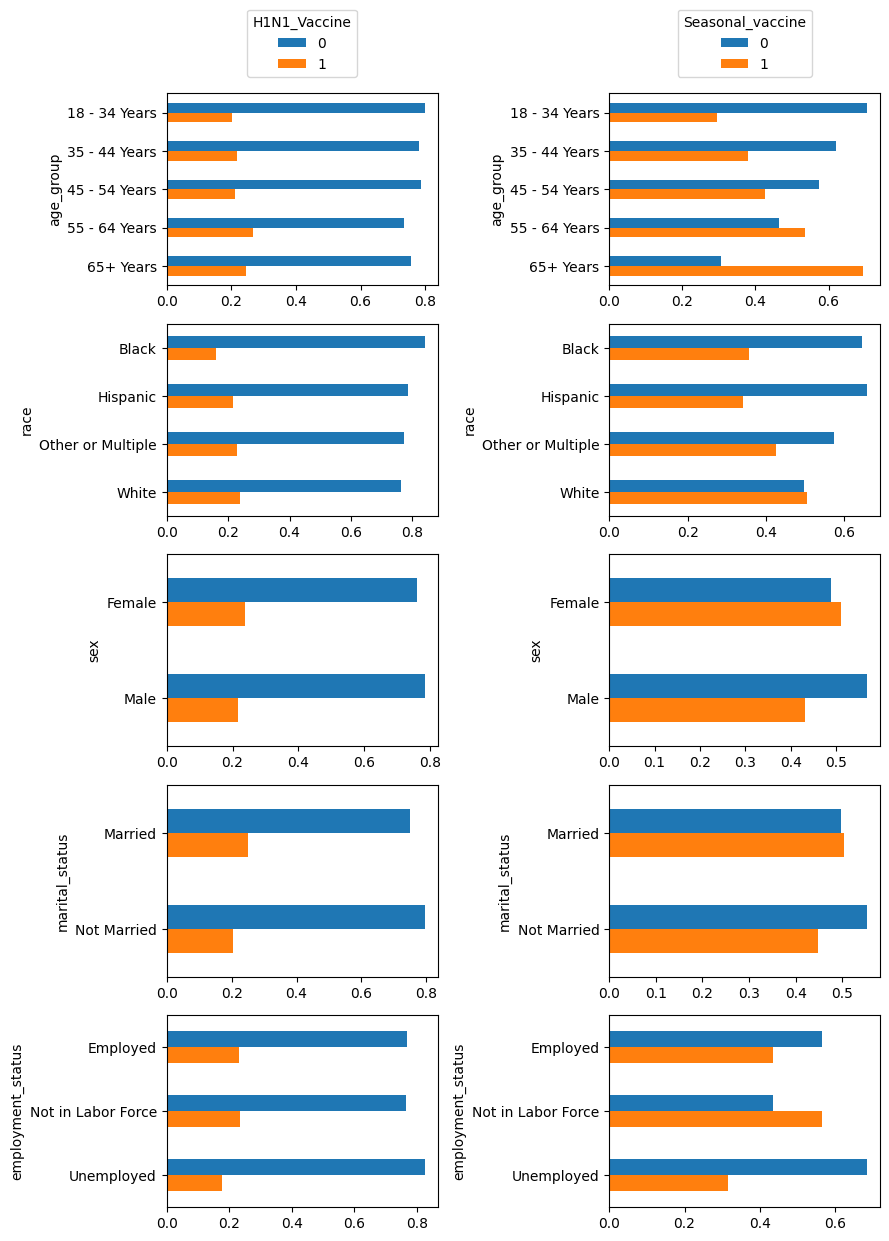

In [33]:
#plotting a group bar chart sgowing association between demographics and vaccine uptake 

def vaccination_rate_plot(col, target, flu_merged, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        df (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (flu_merged[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind='barh', stacked=False, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

cols_to_plot = ['age_group', 'race', 'sex','marital_status', 'employment_status']

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot) * 2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', flu_merged, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', flu_merged, ax=ax[idx, 1])

ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='H1N1_Vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='Seasonal_vaccine')
fig.tight_layout()
plt.show();

### Observations

#### Age group 
1) H1N1 Vaccine, had almost equal distribution across the age groups however the age group between 55-64 recorded the highest
2) Seasonal vaccine,uptake increased with increas in age group with the highest uptake recorded in age group 65
#### Race 
3) White race recorded hghest uptake for both Seasonal vaccine and H1N1 vaccine compared to all other races while blacks recorded lowest uptake for both vaccines 
#### Sex
4) Almost equal proportion of men and women received H1N1 vaccine, however women recieved slightly more vaccines as compared to men for both strains 
#### Marital Status  
5) Higher uptake recorded among married couples for both vaccines  
#### Education
6) College graduates made the majority of those who received both H1N1 Vaccine and Seasonal vaccine
#### Employment status
7) Workers not in labour force were the highest vaccinated group for both H1N1 and Seasonal vaccines with unemployed recording lowest numbers for both vaccines 

### Correlation matrix for behaviour/practice in regard to vaccination status

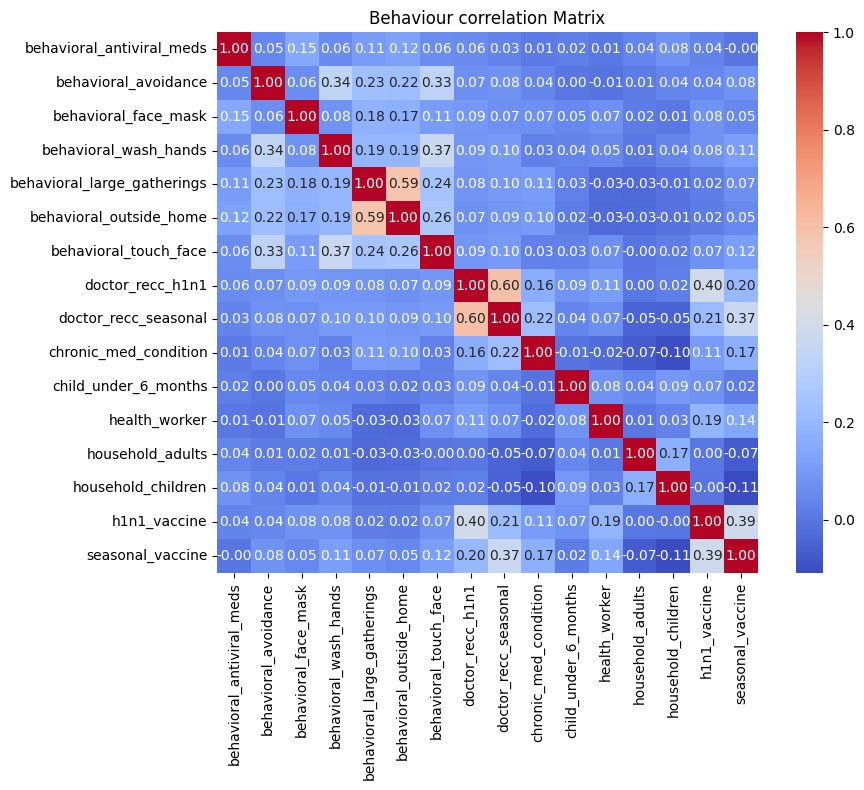

In [34]:
numeric_df = flu_merged.select_dtypes(include = 'number')


corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', square = True)
plt.title('Behaviour correlation Matrix')
plt.tight_layout()
plt.show()

### Behavioural Factors that influence vaccination 

1) High correlation between Doctor_reccomendation for vaccination for both h1n1 (0.40) and seasonal flu vaccine (0.21) and taking the actual vaccines.This highlights the critical role of healthcare professionals in influencing vaccine decisions.

2) Seasonal_vaccine (0.37) and h1n1_vaccine (0.40). Respondents who took the seasonal flu vaccine are also more likely to take the H1N1 vaccine, suggesting general vaccine receptiveness.

3) Doctor_recc_seasonal (0.21): Recommendations for seasonal flu vaccination also correlate positively, though less strongly than for H1N1-specific recommendations.

4) Repondents with chronic show increased uptake of vaccine , more so seasonal vaccine (0.17) as compared to (0.11)  H1N1 vaccine

5) There is moderate correlation between being a healthcare workers and taking both seasonal vaccine (0.14) and H1N1 vaccines (0.19)

6) low correlation is observed between having a face mask (0.12), frequently washing hands (0.11) and taking the seasonal flu vaccine uptake.

7) Most behavioral variables such as mask-wearing, hand-washing, or avoiding close contact with others, reduced time at large gatherings, using face mask, and reduced contact with people outsde home show near-zero correlations, indicating minimal direct relationship with H1N1 vaccine  


# Multivariate Analysis
# Modelling data 
Models used
1) Logistic regression model
2) Decision tree model

In [35]:
import pickle, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from numbers import Number

In [36]:
#loading original data set with numerical data 
flu_dataset_2 = pd.read_csv("training_set_features_original.csv", index_col="respondent_id", encoding="latin1")

#droping non numeric
#flu_dataset_2_numeric = flu_dataset_2.apply (pd.to_numeric, errors = 'coerce')


#flu_dataset_2_cleaned = flu_dataset_2_numeric.dropna()

flu_dataset_2_numeric = flu_dataset_2.select_dtypes(include = ['number'])



flu_dataset_2_numeric.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


In [37]:
#We merge dataframes on respondent_id to merge all variable in one 
flu_merged_2 = pd.merge(flu_dataset_2_numeric, vaccination_status, on='respondent_id', how='left')
flu_merged_2.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0


In [38]:
#dropping missing values 
flu_merged_2 = flu_merged_2.dropna()

In [39]:
#combine y vaccine variables to have one outcome 
flu_merged_2 ['Combined_vaccine_status'] = flu_merged_2['h1n1_vaccine'] + flu_merged_2['seasonal_vaccine']
flu_merged_2['Combined_vaccine_status'] = flu_merged_2['Combined_vaccine_status'].map({2: 2, 1: 1, 0: 0})
flu_merged_2.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,Combined_vaccine_status
respondent_id,,,,,,,,,,,,,,,,,,,,,
26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,2.0,2.0,4.0,2.0,2.0,1.0,0.0,0,0,0
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,5.0,5.0,1.0,4.0,1.0,0.0,0,0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,4.0,4.0,2.0,4.0,3.0,0.0,0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0,0,0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0,0,0


In [40]:
X = flu_merged_2
y = flu_merged_2['Combined_vaccine_status']

In [41]:
#splitting the data set 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [42]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,Combined_vaccine_status
respondent_id,,,,,,,,,,,,,,,,,,,,,
8530,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,4.0,5.0,4.0,2.0,1.0,3.0,0,1,1
26289,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,2.0,5.0,2.0,1.0,1.0,0.0,0,1,1
11056,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,4.0,1.0,4.0,1.0,1.0,1.0,0.0,0,0,0
8303,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,5.0,3.0,1.0,5.0,1.0,0.0,0,0,0
4880,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3.0,2.0,5.0,2.0,2.0,0.0,0.0,0,0,0


In [43]:
X_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,Combined_vaccine_status
respondent_id,,,,,,,,,,,,,,,,,,,,,
8066,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,4.0,4.0,2.0,2.0,0.0,0.0,0,1,1
18432,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,2.0,4.0,5.0,4.0,2.0,1.0,0.0,1,1,2
6895,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,4.0,5.0,2.0,4.0,1.0,0.0,0,0,0
4428,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,4.0,4.0,4.0,1.0,1.0,0.0,0,0,0
12108,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,1.0,5.0,2.0,1.0,0.0,0.0,0,0,0


In [44]:
y_train.head()

respondent_id
8530     1
26289    1
11056    0
8303     0
4880     0
Name: Combined_vaccine_status, dtype: int64

In [45]:
y_test.head()

respondent_id
8066     1
18432    2
6895     0
4428     0
12108    0
Name: Combined_vaccine_status, dtype: int64

In [46]:
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

y_train shape: (10804,)
y_test shape: (2702,)
X_train shape: (10804, 26)
X_test shape: (2702, 26)


### Scaling the model

In [47]:

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate a scaler object
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

## Building a logistic regression model and decision tree model to compare ROC and AUC of the the two models 

#### Logistic Regression

In [48]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# training the model 
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [49]:
#predicting and evaluating the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Accuarcy", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuarcy 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00       793
           2       1.00      1.00      1.00       654

    accuracy                           1.00      2702
   macro avg       1.00      1.00      1.00      2702
weighted avg       1.00      1.00      1.00      2702



In [50]:
#cross validation of model
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y ,cv=5, scoring = 'accuracy')
print('Cross_Validated accuracy scores:' , score)
print('Mean accuracy:', score.mean())


Cross_Validated accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


#### Model is accuartely predicting  

## Model 2 will be a decison tree model to comapre with logistic model

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Data set
X = flu_merged_2
y = flu_merged_2['Combined_vaccine_status']

#splitting data set into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =42)

#initailizing and training the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#predicting 
y_pred = model.predict(X_test)

#evaluating the models accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")



Accuracy:1.00


#### Both models accurately predicting vaccine uptake 

# Conclusion 

The results of this study ascertain certain vaccine uptake factors such as opinions/knowledge and demographic factors provide an understanding and influence vaccination decision.This factors may provide guidance on better approaches by groups intending to accelaret vaccine uptake in similar settings. 

1) Low vaccine uptake among younger population, people of black race, and unemployed individuals

2) Tertiary education was found to be a strong predictor of vaccination, those with tertiary and secondary level of education being more inclined to get the vaccine

2) Increased uptake of seasonal flu vaccines as compared to H1N1 vaccine 

3) Those who perceived vaccination as a way of preventing disease and were at risk of infection without the vaccine were more likely to be vaccinated 

5) Respondent who had reccomendations from health care workers to get vaccinated understood that vaccination plays a crucial line of defence from infections

# Reccomendation

From this study, the following suggestions may be made to improve h1n1 and seasonal vaccination uptake in the Counrty,and other places:

1) There is a need to tailor educational intervention programs for specific target groups targeting the low-income groups,African americans and unemployed in vaccination drives/accelartion camapigns.

2) Use of information, Education and communication (IEC) materials such as visula Aids, posters, flyers and media to effectively communicate and educate public on role of vaccination Considering that education level affected vaccine uptake

3) Continuos advocacy and socila mobilization with context specific tailored messaging such as effectiveness of vaccines ,percieved risks of opting out of vaccinnation drives and, clarifying misconceptions, and creating awareness on flu symptoms and prevention measures 

4) Creating awareness about diseases of like nature such as seasonal flu and H1N1 should also be targeted alongside promoting inoculation to increase vaccine acceptance.Considering that seasonal flu had more acceptance than H1N1


5) The importance of position of health workers in reinforcing vaccine uptake has been highlighted,therefore healthcare workers should be prepared and knowledgeable as to participate in a discussion on vaccination together with the patient, in their daily health check-ups and Introduction of vaccination at service delivery points especially for adult targeted vaccines such as flu and h1n1 vaccines, which will in turnlead to reduced missed opportunities for vaccination 